In [56]:

# cargar base de datos x,y y plotear
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [57]:
df_x = pd.read_csv('./Ejercicio en Clase archivos adjuntos 8 de noviembre de 2023 1120 a. m./x.csv', header=None)
df_y = pd.read_csv('./Ejercicio en Clase archivos adjuntos 8 de noviembre de 2023 1120 a. m./y.csv', header=None)

#drop first column
df_x = df_x.drop(df_x.columns[0], axis=1)

# column 1 name = X
df_x.columns = ['X', 'Y']
df_x








,X,Y
0,0.000000,1.000000
1,2.822737,4.154048
2,0.741074,0.032447
3,4.794975,0.404499
4,1.672767,3.685057
...,...,...
196,3.035141,4.776586
197,4.343927,1.170200
198,3.656601,2.025832
199,4.031428,3.240811


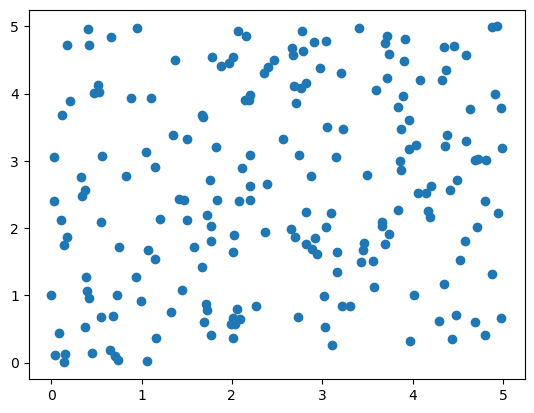

In [58]:
# plot X and Y
plt.scatter(df_x['X'], df_x['Y'])


In [62]:
import numpy as np

class Perceptron:
    def __init__(self, input_size, learning_rate=0.01, epochs=100):
        self.weights = np.zeros(input_size + 1)
        self.learning_rate = learning_rate
        self.epochs = epochs

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        return 1 if summation > 0 else 0

    def train(self, training_inputs, labels):
        for _ in range(self.epochs):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                self.weights[1:] += self.learning_rate * (label - prediction) * inputs
                self.weights[0] += self.learning_rate * (label - prediction)

# Ejemplo de uso para clasificación
training_inputs = df_x[['X', 'Y']].to_numpy()
labels = df_y.drop(df_y.columns[0], axis=1).to_numpy()

perceptron = Perceptron(2)
perceptron.train(training_inputs, labels)



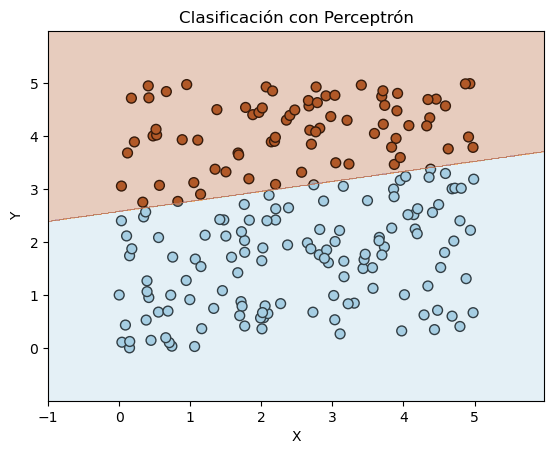

In [63]:
import matplotlib.pyplot as plt

# Crear una malla para el gráfico
x_min, x_max = df_x['X'].min() - 1, df_x['X'].max() + 1
y_min, y_max = df_x['Y'].min() - 1, df_x['Y'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predecir la clasificación para cada punto en la malla
Z = np.array([perceptron.predict(np.array([x, y])) for x, y in np.c_[xx.ravel(), yy.ravel()]])
Z = Z.reshape(xx.shape)

# Graficar los puntos de datos
plt.scatter(df_x['X'], df_x['Y'], c=df_y[df_y.columns[1]], cmap=plt.cm.Paired, edgecolors='k', marker='o', s=50)

# Graficar la región de decisión del perceptrón
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)

# Configurar el título y etiquetas del eje
plt.title('Clasificación con Perceptrón')
plt.xlabel('X')
plt.ylabel('Y')

# Mostrar el gráfico
plt.show()
